# In summary,
this code demonstrates a complete machine learning workflow for a classification problem using the Iris dataset. It includes data exploration, visualization, encoding, model training, and evaluation.

# Import Libraries: 
Import necessary libraries including pandas, matplotlib, seaborn, and scikit-learn.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the Dataset:
Load the Iris dataset from a CSV file named "IRIS.csv" into a DataFrame called dataset.

In [2]:
dataset = pd.read_csv("IRIS.csv")

In [3]:
dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Data Exploration:

# 
Use dataset.info() to get information about the dataset, including data types and non-null counts.

In [ ]:
dataset.info()

# 
Use dataset.describe() to get statistical summaries of the numerical columns.

In [6]:
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# 
Count the unique values in the dataset using dataset.nunique().

In [7]:
dataset.value_counts()

sepal_length  sepal_width  petal_length  petal_width  species        
4.9           3.1          1.5           0.1          Iris-setosa        3
5.8           2.7          5.1           1.9          Iris-virginica     2
              4.0          1.2           0.2          Iris-setosa        1
5.9           3.0          4.2           1.5          Iris-versicolor    1
6.2           3.4          5.4           2.3          Iris-virginica     1
                                                                        ..
5.5           2.3          4.0           1.3          Iris-versicolor    1
              2.4          3.7           1.0          Iris-versicolor    1
                           3.8           1.1          Iris-versicolor    1
              2.5          4.0           1.3          Iris-versicolor    1
7.9           3.8          6.4           2.0          Iris-virginica     1
Length: 147, dtype: int64

# 
Count the occurrences of each species using dataset['species'].value_counts().

In [10]:
dataset['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

# 
Check for missing values using dataset.isnull().sum() (this dataset has no missing values).

In [13]:
dataset.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [14]:
dataset.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

# Data Visualization:

Plot histograms for the four numerical columns: 'sepal_length', 'sepal_width', 'petal_length', and 'petal_width'.

Create scatter plots to visualize relationships between 'sepal_length' and 'sepal_width', as well as 'petal_length' and 'petal_width'. 

The data points are color-coded by species.

<AxesSubplot:>

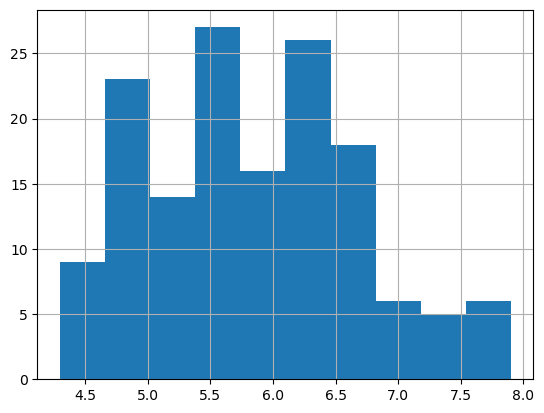

In [16]:
dataset['sepal_length'].hist()

<AxesSubplot:>

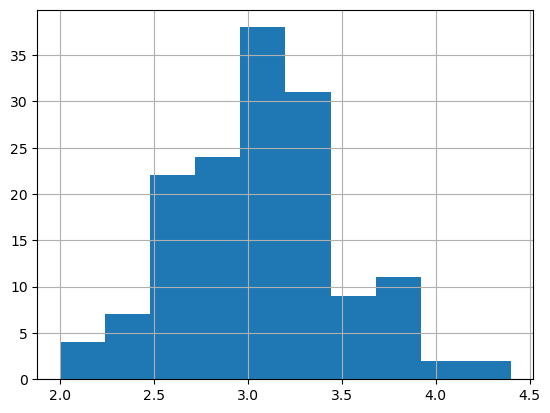

In [17]:
dataset['sepal_width'].hist()

<AxesSubplot:>

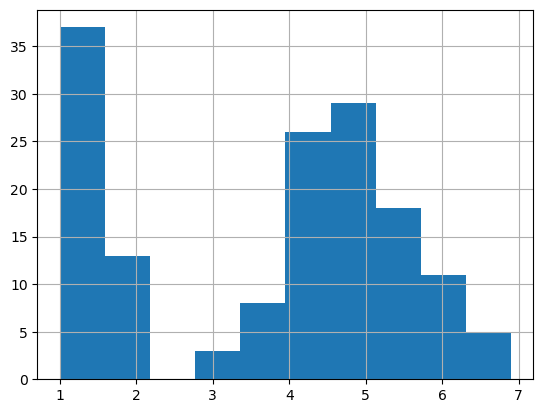

In [18]:
dataset['petal_length'].hist()

<AxesSubplot:>

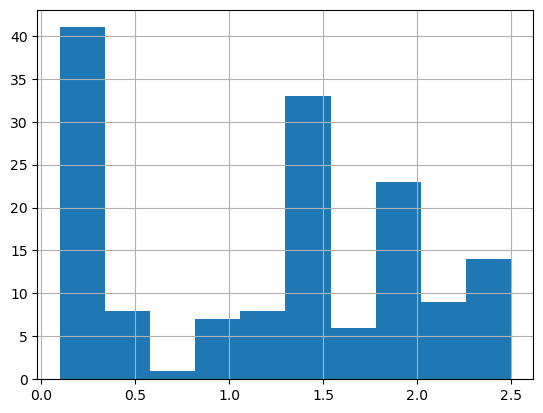

In [19]:
dataset['petal_width'].hist()

In [20]:
colurs = ['red' , 'orange' , 'blue']
species = ['Iris-setosa' , 'Iris-virginica' ,'Iris-versicolor']

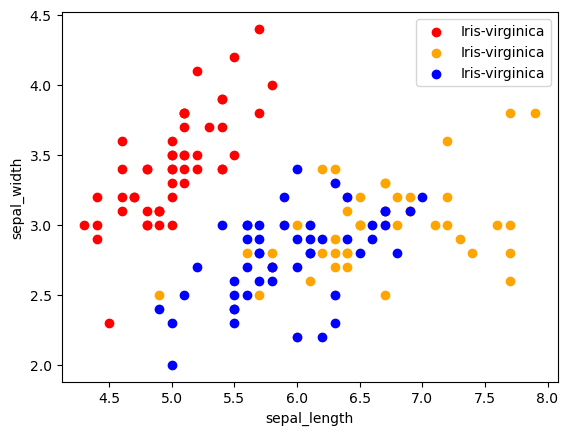

In [24]:
for i in range(3):
    x = dataset[dataset['species'] == species[i]]
    plt.scatter(x['sepal_length'],x['sepal_width'] ,c= colurs[i] , label=species[1] )
    
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend()
    

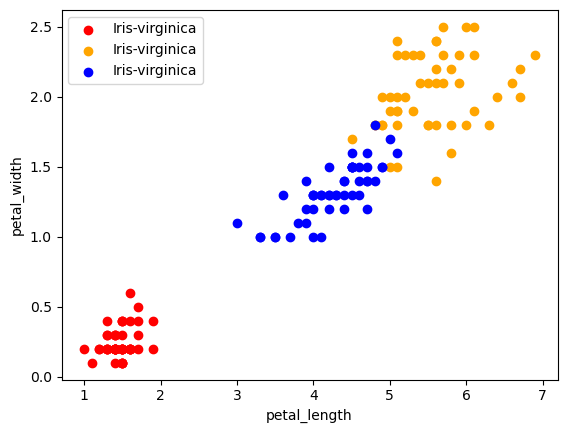

In [25]:
for i in range(3):
    x = dataset[dataset['species'] == species[i]]
    plt.scatter(x['petal_length'],x['petal_width'] ,c= colurs[i] , label=species[1] )
    
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.legend()
    

In [26]:
data =dataset

In [27]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [28]:
data.drop('species' , axis=1)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# Data Correlation:

Calculate the correlation matrix using data.corr() to understand the relationships between features.
Visualize the correlation matrix using a heatmap.

In [30]:
data.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

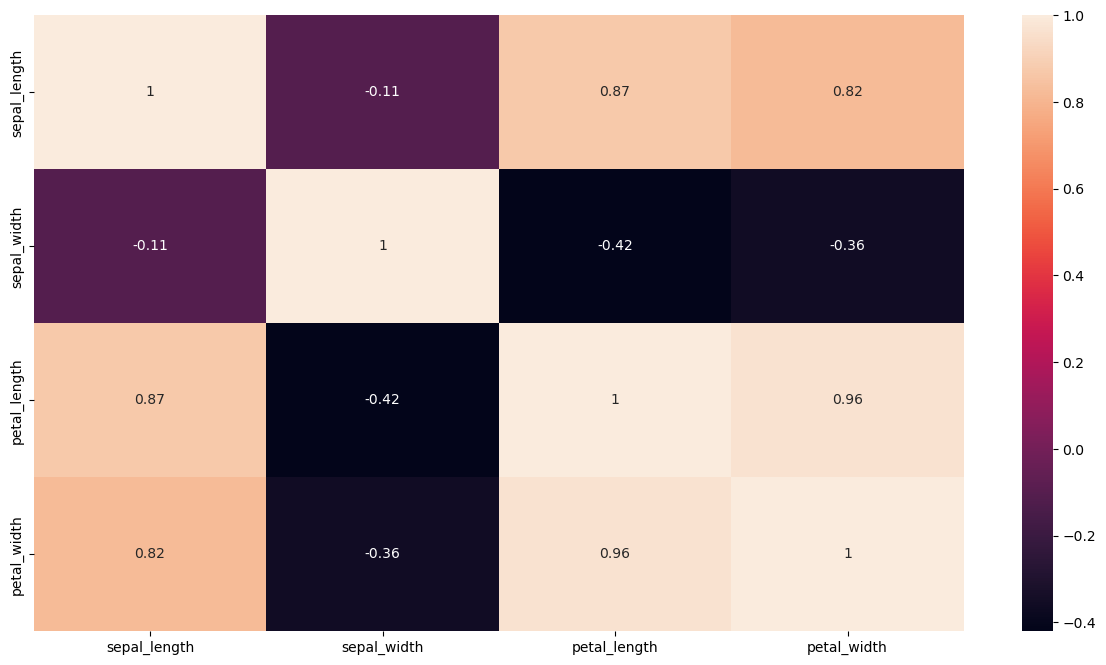

In [31]:
corr = data.corr()
fig,ax =plt.subplots(figsize =(15,8))
sns.heatmap(corr , annot=True)

# Label Encoding:

Encode the 'species' column, which contains categorical data, into numerical labels using LabelEncoder from scikit-learn.

In [32]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [33]:
dataset['species'] = label.fit_transform(dataset['species'])

In [34]:
dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# Data Splitting:

Split the dataset into features (x) and the target variable (y).

Further split the data into training and testing sets using train_test_split.

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x = dataset.drop(columns=['species'])
y = dataset['species']

In [37]:
x_train,x_test,y_train,y_test=train_test_split( x, y, test_size=0.20, random_state=20)

# Model Building:

Train three different classification models:

# Logistic Regression (model)

In [40]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [41]:
model.fit(x_train,y_train)

LogisticRegression()

In [42]:
model.score(x_train,y_train)

0.9666666666666667

# k-Nearest Neighbors (new_model)

In [44]:
from sklearn.neighbors import KNeighborsClassifier
new_model = KNeighborsClassifier()

In [45]:
new_model.fit(x_train,y_train) 

KNeighborsClassifier()

In [46]:
new_model.score(x_train,y_train)

C:\Mechanical\python anconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9833333333333333

# Decision Tree Classifier (tree_model)

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
tree_model = DecisionTreeClassifier()

In [49]:
tree_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [50]:
tree_model.score(x_train,y_train)

1.0

# Random Forest Classifier (reg)

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [52]:
reg = RandomForestClassifier()

In [53]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [54]:
reg.fit(x_train,y_train)

RandomForestClassifier()

# Model Evaluation:

Calculate the training accuracy of each model using model.score(x_train, y_train).

Calculate the accuracy of the Random Forest Classifier on both the training and testing sets using reg.score(x_train, y_train) and reg.score(x_test, y_test).

In [55]:
reg.score(x_train,y_train)

1.0

In [56]:
reg.score(x_test,y_test)

0.9333333333333333